In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(1, "../..")
from itertools import product
from prototype_nn import Splitting, predictions, tensor_flatten
import matplotlib.pyplot as plt
import prototype
import torch

## Training : Simulations

In [316]:
training = pd.DataFrame(data = pd.read_csv("../../data/train/bouncing.csv"))
training.head()

,initial_position,initial_velocity,time,position,velocity
0,10,15,0.0,10.00000,15.000
1,10,15,0.1,11.45095,14.019
2,10,15,0.2,12.80380,13.038
3,10,15,0.3,14.05855,12.057
4,10,15,0.4,15.21520,11.076


In [317]:
len(training)

5002

In [318]:
training["initial_parameters"] = list(zip(training.initial_position, training.initial_velocity))
training.head()

,initial_position,initial_velocity,time,position,velocity,initial_parameters
0,10,15,0.0,10.00000,15.000,"(10, 15)"
1,10,15,0.1,11.45095,14.019,"(10, 15)"
2,10,15,0.2,12.80380,13.038,"(10, 15)"
3,10,15,0.3,14.05855,12.057,"(10, 15)"
4,10,15,0.4,15.21520,11.076,"(10, 15)"


In [319]:
initial = training[training["initial_parameters"] == (11,15)]

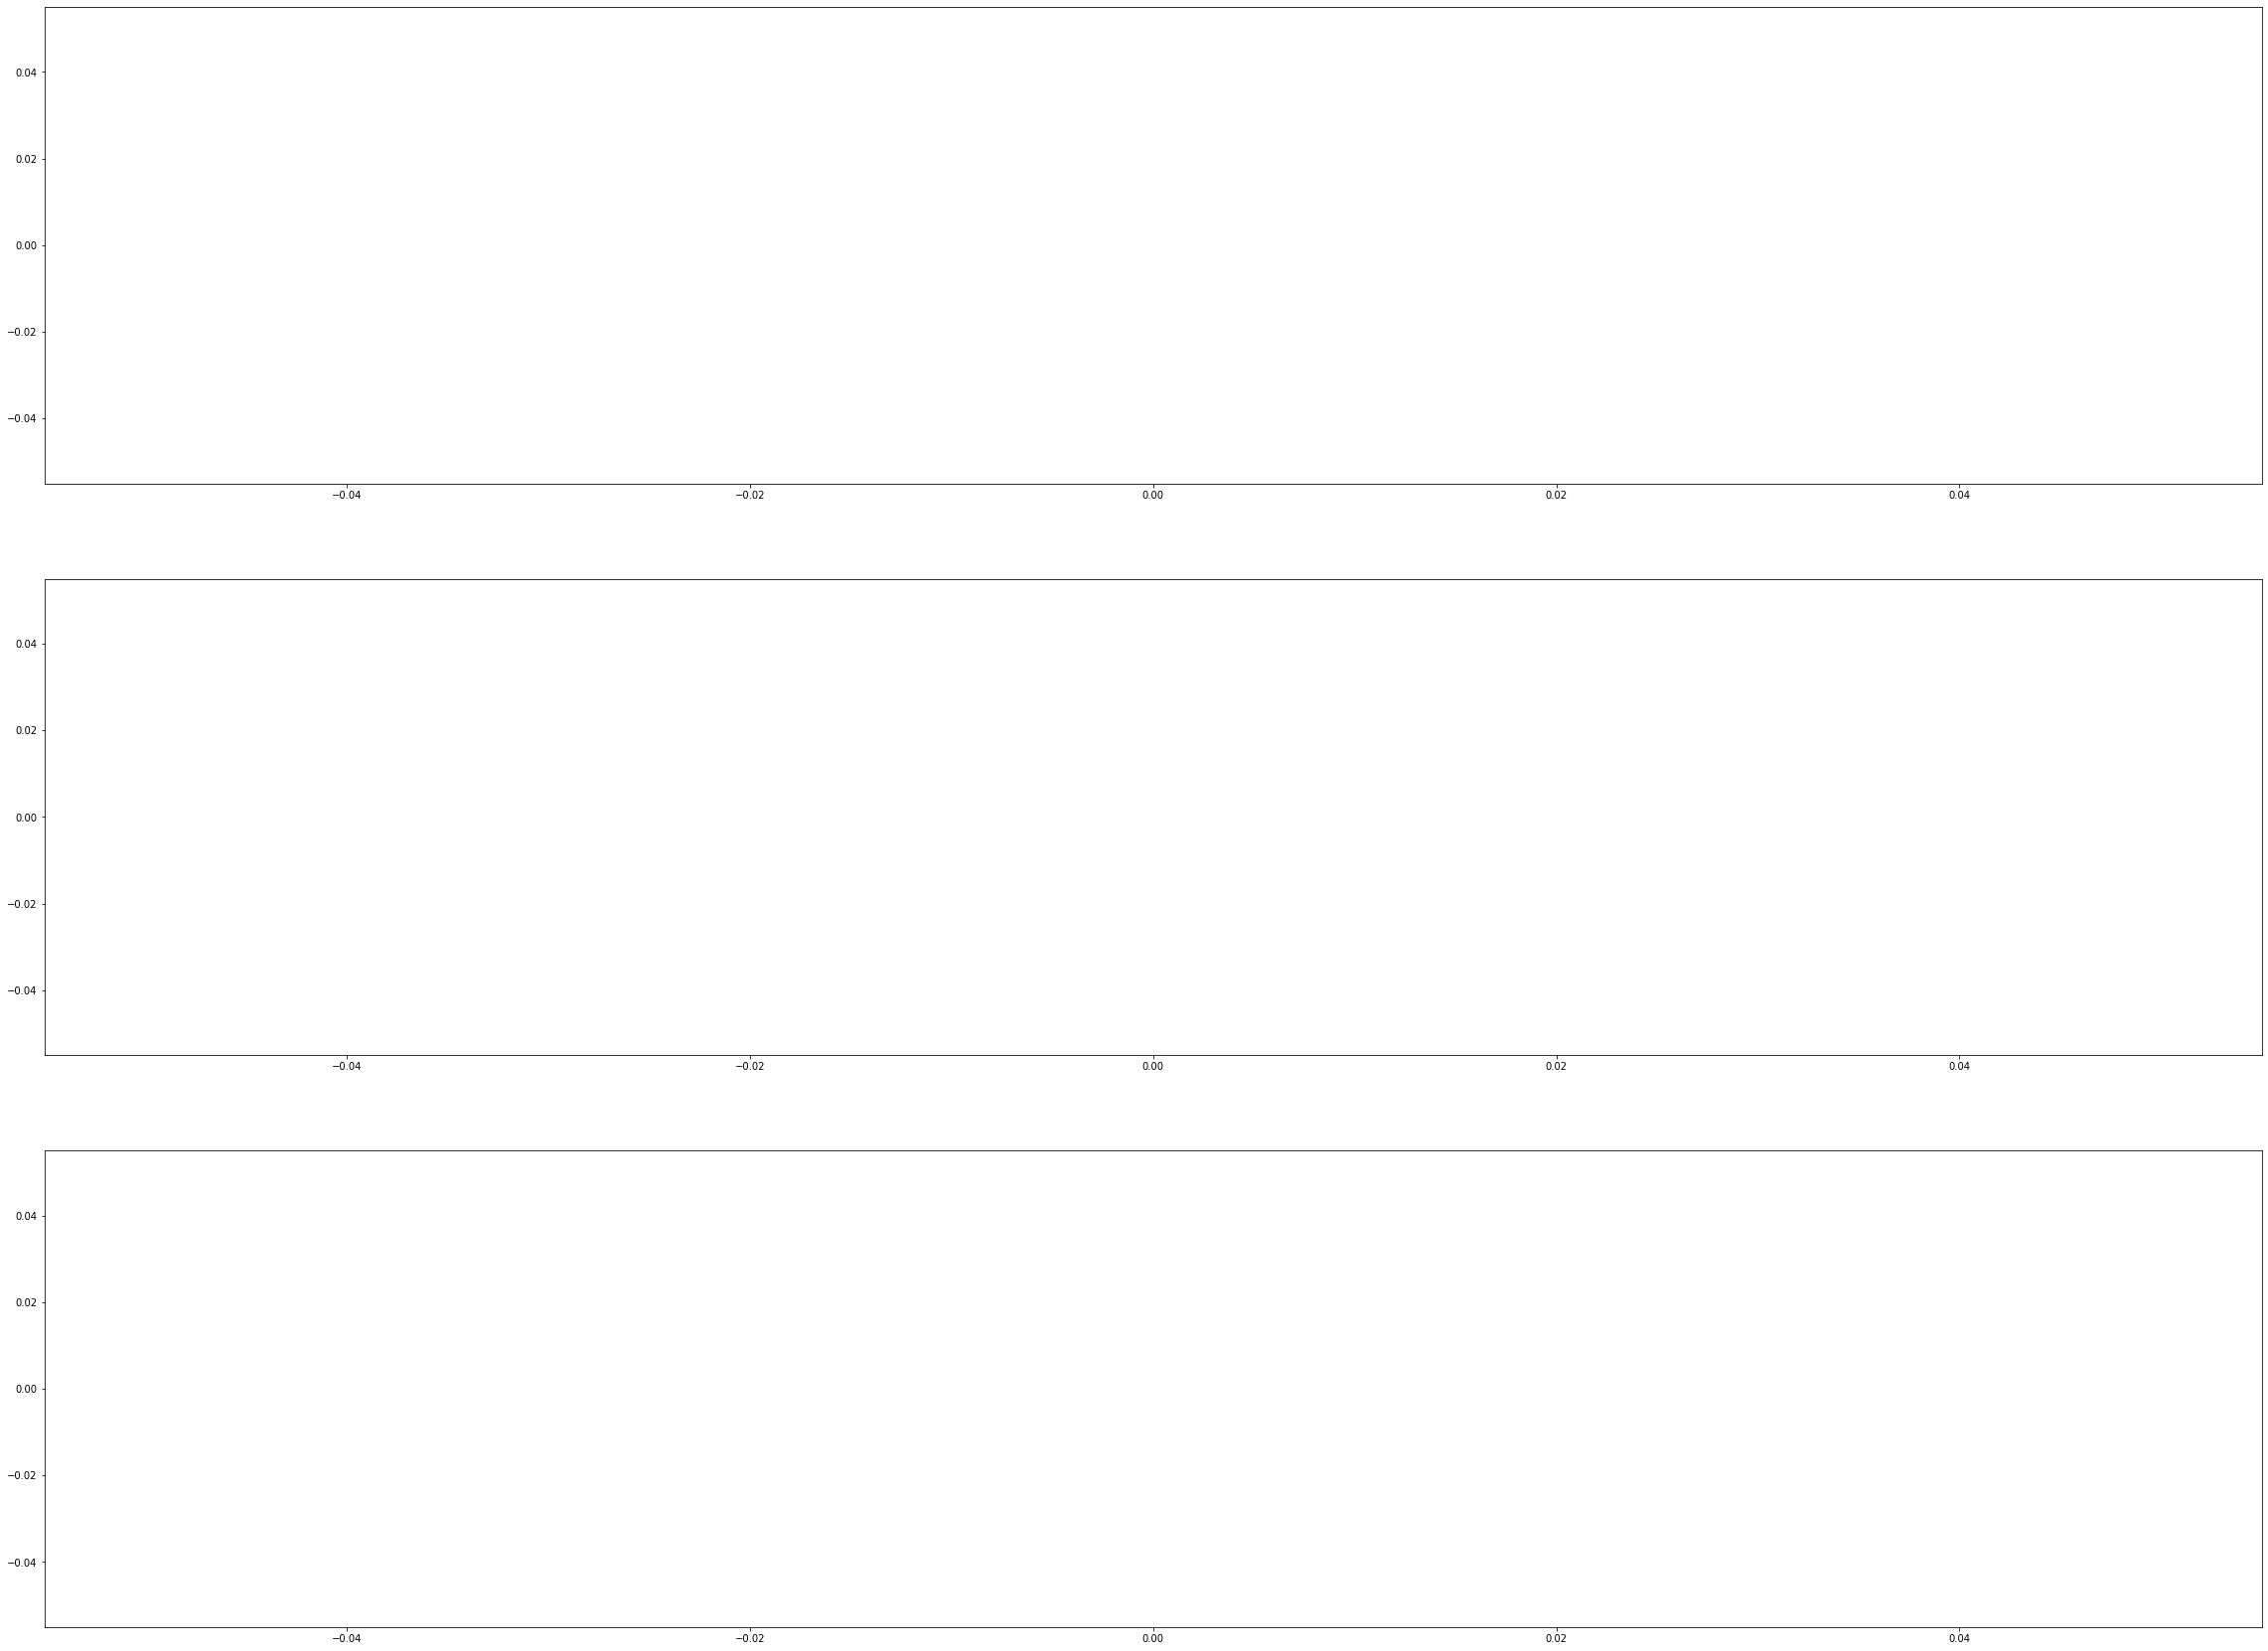

In [305]:
fig, ax = plt.subplots(nrows = 3, figsize=(40,30))
ax[0].plot(initial[["time"]], initial[["velocity"]])
ax[1].plot(initial[["position"]], initial[["velocity"]])
ax[2].plot(initial[["time"]], initial[["position"]])

In [260]:
kfold = Splitting([0,1,2], [3,4], num_epoches = 20, batch_size = 64, lr= 0.000001, layer_list = [3, 100, 200, 400, 800, 1600, 2])
#kfold = Splitting([0,1,2], [3,4], num_epoches = 10, batch_size = 16, lr= 0.001)

In [149]:
evaluate = kfold.cross_validation_evaluate(training, 5)

------------- Fold 0 -------------
TEST: 0 TRAIN: [1, 2, 3, 4]


KeyboardInterrupt: 

In [ ]:
evaluate

In [ ]:
average_loss = 0
for x in evaluate:
    average_loss += x.item()
average_loss/len(evaluate)

## Training : Predictions

In [306]:
training_preds = pd.DataFrame(data = pd.read_csv("../../data/preds/train/bouncing.csv"))
training_preds.head()

,time,initial_position,initial_velocity,position,velocity
0,0.0,10,15,15.793913,1.454088
1,0.1,10,15,15.712290,1.411848
2,0.2,10,15,15.628906,1.370869
3,0.3,10,15,15.544648,1.330061
4,0.4,10,15,15.459179,1.289527


In [307]:
training_preds["initial_parameters"] = list(zip(training_preds.initial_position, training_preds.initial_velocity))
training_preds = training_preds.drop(columns = ["initial_position", "initial_velocity"])
training = training.drop(columns = ["initial_position", "initial_velocity"])
training_preds = training_preds.rename(columns={
                                            'position' : 'position_preds',
                                            'velocity' : 'velocity_preds'})

In [308]:
training_preds.head()

,time,position_preds,velocity_preds,initial_parameters
0,0.0,15.793913,1.454088,"(10, 15)"
1,0.1,15.712290,1.411848,"(10, 15)"
2,0.2,15.628906,1.370869,"(10, 15)"
3,0.3,15.544648,1.330061,"(10, 15)"
4,0.4,15.459179,1.289527,"(10, 15)"


In [309]:
training.head()

,time,position,velocity,initial_parameters
0,0.0,10.00000,15.000,"(10, 15)"
1,0.1,11.45095,14.019,"(10, 15)"
2,0.2,12.80380,13.038,"(10, 15)"
3,0.3,14.05855,12.057,"(10, 15)"
4,0.4,15.21520,11.076,"(10, 15)"


In [310]:
training_and_predictions = pd.merge(training, training_preds, right_on=["time", "initial_parameters"], left_on=["time", "initial_parameters"])

In [311]:
training_and_predictions.head()

,time,position,velocity,initial_parameters,position_preds,velocity_preds
0,0.0,10.00000,15.000,"(10, 15)",15.793913,1.454088
1,0.1,11.45095,14.019,"(10, 15)",15.712290,1.411848
2,0.2,12.80380,13.038,"(10, 15)",15.628906,1.370869
3,0.3,14.05855,12.057,"(10, 15)",15.544648,1.330061
4,0.4,15.21520,11.076,"(10, 15)",15.459179,1.289527


In [312]:
def hue(df, hue):
    for var in hue:
        columns = list(df.columns)
        columns.remove(var)
        columns.remove("{}_{}".format(var,"preds"))
        df = df.melt(columns, var_name=var, value_name = f"{var}_value")
    return df

## Graphs

In [320]:
def plot(x,y, **kwargs):
    plt.plot(x,y)

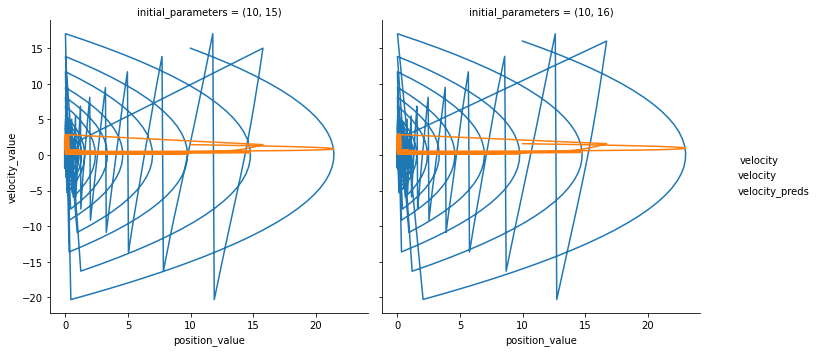

In [321]:
g = sns.FacetGrid(hue(training_and_predictions, ["position", "velocity"]), height = 5, col="initial_parameters", hue="velocity", col_wrap=2,)
g.map(plot, "position_value", "velocity_value", ci=None)
g.add_legend()

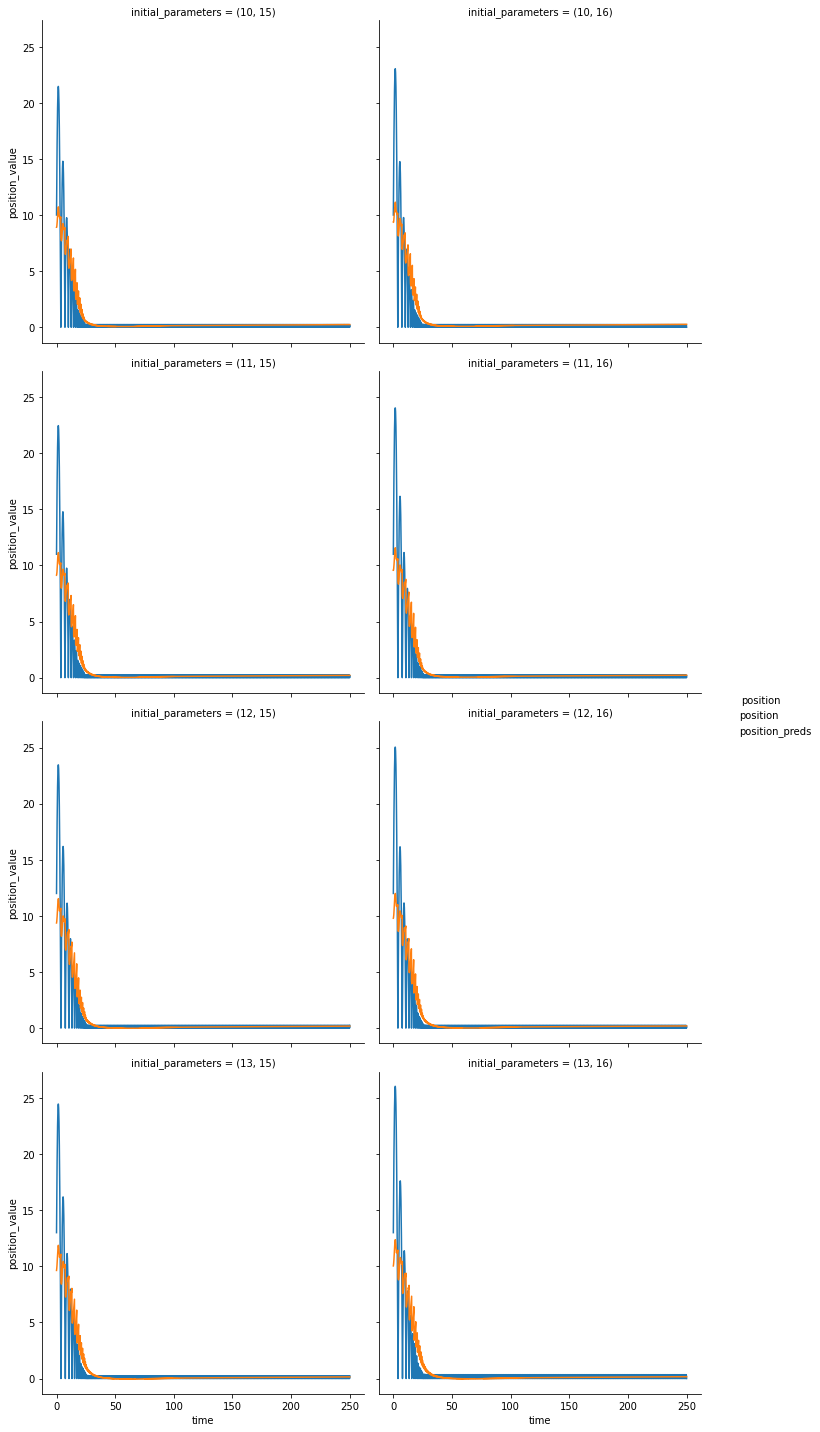

In [237]:
g = sns.FacetGrid(hue(training_and_predictions, ["position"]), col="initial_parameters", height = 5, hue="position", col_wrap=2,)
g.map(plot, "time", "position_value")
g.add_legend()

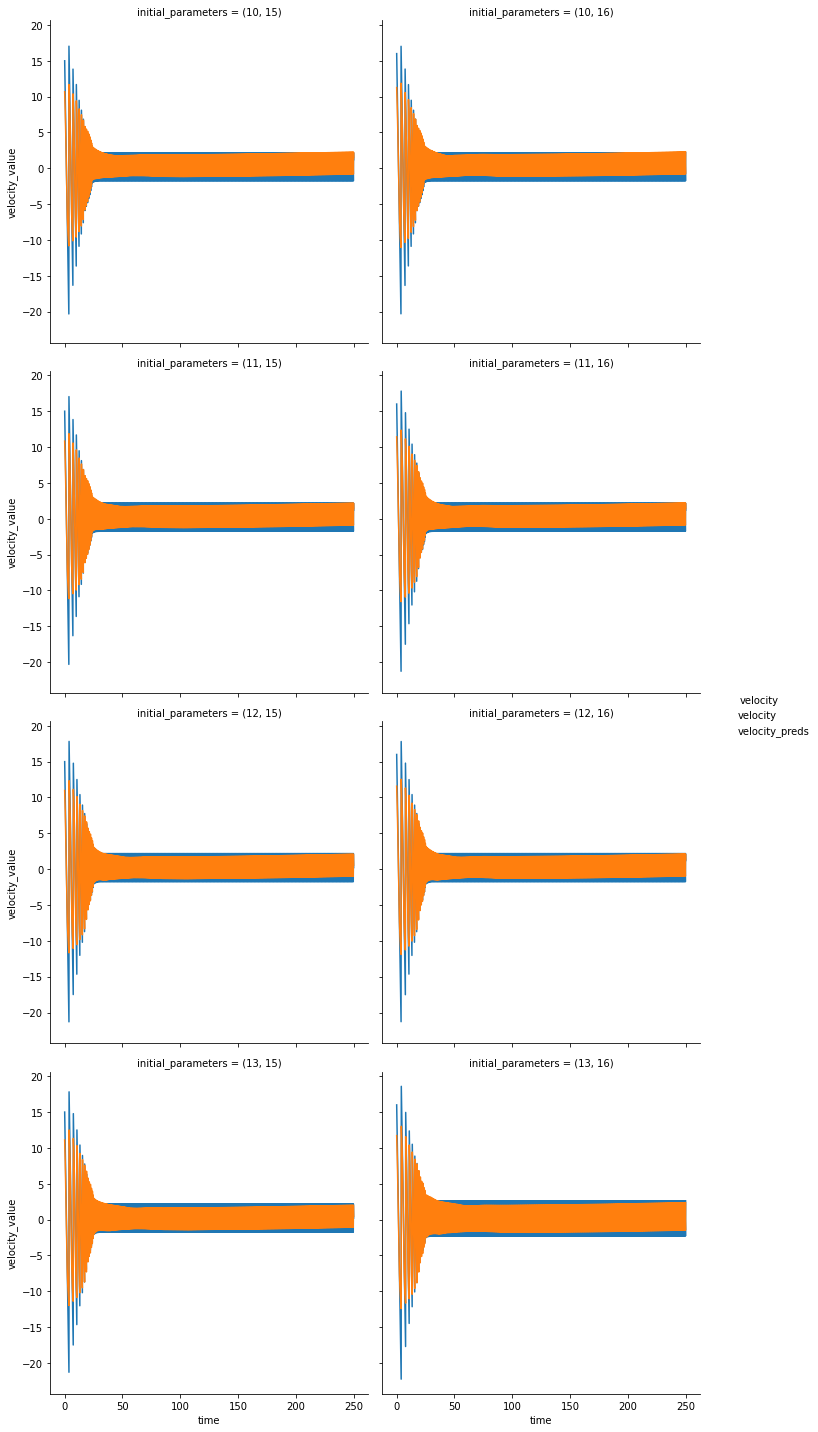

In [238]:
g = sns.FacetGrid(hue(training_and_predictions, ["velocity"]), col="initial_parameters", height = 5, hue="velocity", col_wrap=2,)
g.map(plot, "time", "velocity_value", ci=None)
g.add_legend()